Kenan Stredic

In [ ]:
# This is only to setup PySpark and Spark NLP on Colab
!wget https://setup.johnsnowlabs.com/colab.sh -O - | bash

--2023-12-04 17:28:25--  https://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2023-12-04 17:28:26--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1191 (1.2K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.16K  --.-KB/s    in 0s      

2023-12-04 17:28:26 (88.1 MB/s) - written to stdout [1191/1191]

Installi

Question 1

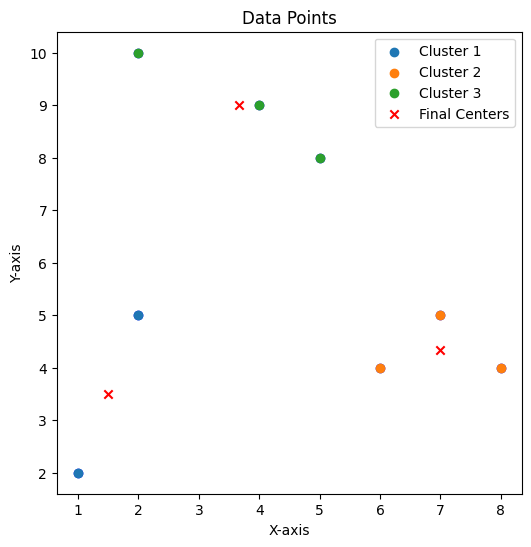

Final Centers:
Cluster 1: [1.5 3.5]
Cluster 2: [7.         4.33333333]
Cluster 3: [3.66666667 9.        ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Given points in a 2D space
points = np.array([(2, 10), (2, 5), (8, 4), (5, 8), (7, 5), (6, 4), (1, 2), (4, 9)])

# Function to calculate Euclidean distance between points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Function to calculate cluster centers
def calculate_centers(points, centers):
    clusters = {}
    for point in points:
        distances = [euclidean_distance(point, center) for center in centers]
        cluster_index = np.argmin(distances)
        if cluster_index not in clusters:
            clusters[cluster_index] = []
        clusters[cluster_index].append(point)

    new_centers = [np.mean(clusters[key], axis=0) for key in sorted(clusters.keys())]
    return new_centers

# Function to perform K-Means iterations
def k_means(points, initial_centers, max_iterations=10):
    centers = initial_centers
    for i in range(max_iterations):
        new_centers = calculate_centers(points, centers)
        if np.array_equal(centers, new_centers):
            break
        centers = new_centers
    return centers

# Plotting the data points
plt.figure(figsize=(6, 6))
plt.scatter(points[:,0], points[:,1], color='blue')
plt.title('Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Initial clusters and centers
initial_centers = np.array([(2, 5), (5, 8), (4, 9)])

# Calculate final centers after convergence
final_centers = k_means(points, initial_centers)

# Plotting final data points and clusters
final_clusters = {i: [] for i in range(len(final_centers))}
for point in points:
    distances = [euclidean_distance(point, center) for center in final_centers]
    cluster_index = np.argmin(distances)
    final_clusters[cluster_index].append(point)

for i, cluster_points in final_clusters.items():
    cluster_points = np.array(cluster_points)
    plt.scatter(cluster_points[:,0], cluster_points[:,1], label=f'Cluster {i+1}')

# Plotting final centers
final_centers = np.array(final_centers)
plt.scatter(final_centers[:,0], final_centers[:,1], color='red', marker='x', label='Final Centers')
plt.legend()
plt.show()

# Display final centers
print("Final Centers:")
for i, center in enumerate(final_centers):
    print(f"Cluster {i+1}: {center}")


Question 2

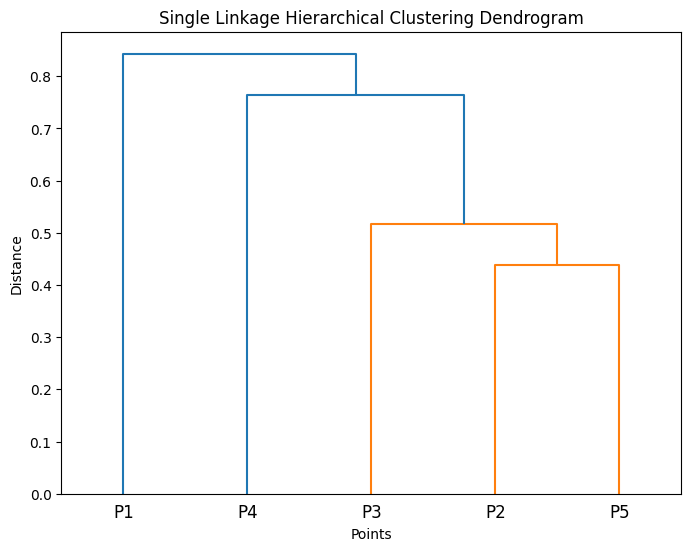

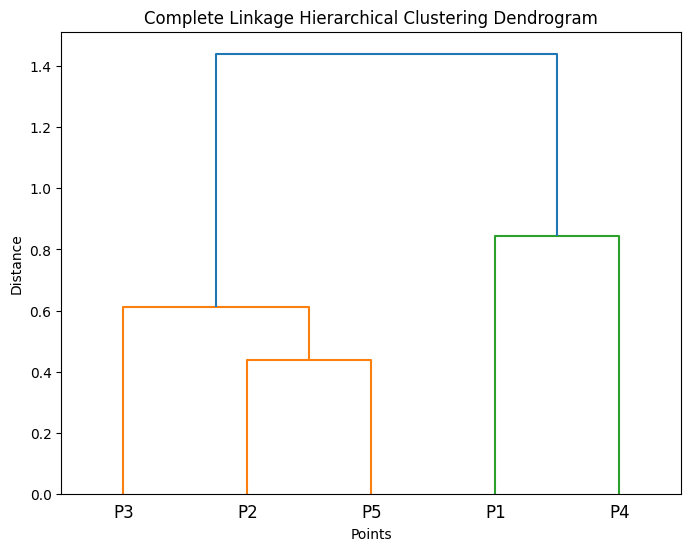

In [ ]:
# Given similarity matrix
similarity_matrix = [
    [1.00, 0.10, 0.41, 0.55, 0.35],
    [0.10, 1.00, 0.64, 0.47, 0.98],
    [0.41, 0.64, 1.00, 0.44, 0.85],
    [0.55, 0.47, 0.44, 1.00, 0.76],
    [0.35, 0.98, 0.85, 0.76, 1.00]
]

# Perform single linkage hierarchical clustering
Z_single = linkage(similarity_matrix, method='single')

# Plot dendrogram for single linkage
plt.figure(figsize=(8, 6))
plt.title('Single Linkage Hierarchical Clustering Dendrogram')
dendrogram(Z_single, labels=['P1', 'P2', 'P3', 'P4', 'P5'])
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

# Perform complete linkage hierarchical clustering
Z_complete = linkage(similarity_matrix, method='complete')

# Plot dendrogram for complete linkage
plt.figure(figsize=(8, 6))
plt.title('Complete Linkage Hierarchical Clustering Dendrogram')
dendrogram(Z_complete, labels=['P1', 'P2', 'P3', 'P4', 'P5'])
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

Question 3

In [ ]:
'''
# Given ratings matrix (10 customers for 6 products)
ratings_matrix = np.array([
    [5, 8, 0, 3, 4, 0],
    [0, 7, 8, 0, 5, 6],
    [4, 0, 0, 4, 3, 0],
    [2, 3, 4, 0, 6, 7],
    [0, 2, 0, 5, 0, 8],
    [8, 9, 0, 0, 7, 7],
    [0, 0, 5, 3, 4, 6],
    [4, 6, 7, 0, 8, 9],
    [5, 0, 8, 0, 0, 0],
    [0, 0, 6, 7, 0, 5]
])

# User-User Collaborative Filtering
user_id = 5
product_id = 2
neighborhood_size = 3

# Ensure ratings_matrix_transposed is calculated correctly
ratings_matrix_transposed = ratings_matrix.T

# Finding similar users using Pearson correlation coefficient
def pearson_correlation(user1_ratings, user2_ratings):
    common_ratings = np.logical_and(user1_ratings != 0, user2_ratings != 0)
    if np.sum(common_ratings) < 2:  # At least 2 common ratings required
        return 0
    mean_user1 = np.mean(user1_ratings[common_ratings])
    mean_user2 = np.mean(user2_ratings[common_ratings])
    numerator = np.sum((user1_ratings[common_ratings] - mean_user1) * (user2_ratings[common_ratings] - mean_user2))
    denominator = np.sqrt(np.sum((user1_ratings[common_ratings] - mean_user1)**2) * np.sum((user2_ratings[common_ratings] - mean_user2)**2))
    return numerator / denominator

similarities = [pearson_correlation(ratings_matrix[user_id - 1], ratings_matrix[i]) for i in range(len(ratings_matrix))]
similar_users = np.argsort(similarities)[::-1][:neighborhood_size]

# Predicting user 5's rating for product 2 using User-User collaborative filtering
predicted_rating_user_user = np.mean([ratings_matrix[user][product_id - 1] for user in similar_users if ratings_matrix[user][product_id - 1] != 0])

print(f"User-User Collaborative Filtering prediction for User {user_id} and Product {product_id}: {predicted_rating_user_user:.2f}")

# Item-Item Collaborative Filtering
def cosine_similarity(item1_ratings, item2_ratings):
    common_ratings = np.logical_and(item1_ratings != 0, item2_ratings != 0)
    if np.sum(common_ratings) == 0:
        return 0
    numerator = np.sum(item1_ratings[common_ratings] * item2_ratings[common_ratings])
    denominator = np.sqrt(np.sum(item1_ratings[common_ratings]**2) * np.sum(item2_ratings[common_ratings]**2))
    return numerator / denominator

def predict_item_item(user_id, product_id):
    neighborhood_size_item = 2

    # Ensure ratings_matrix_transposed is calculated correctly
    ratings_matrix_transposed = ratings_matrix.T

    # Finding similar items using Cosine similarity
    similarities_item = []
    for item1 in range(len(ratings_matrix_transposed)):
        for item2 in range(len(ratings_matrix_transposed)):
            if item1 != item2:
                similarity = cosine_similarity(ratings_matrix_transposed[item1], ratings_matrix_transposed[item2])
                similarities_item.append(similarity)

    similar_items = np.argsort(similarities_item)[::-1][:neighborhood_size_item]

    # Predicting user's rating for the product using Item-Item collaborative filtering
    relevant_ratings = [ratings_matrix[user_id - 1][item] for item in similar_items if
                        item < len(ratings_matrix[user_id - 1]) and ratings_matrix[user_id - 1][item] != 0]

    if len(relevant_ratings) > 0:
        predicted_rating_item_item = np.mean(relevant_ratings)
        print(f"Item-Item Collaborative Filtering prediction for User {user_id} and Product {product_id}: {predicted_rating_item_item:.2f}")
    else:
        print(f"Not enough information to make prediction for User {user_id} and Product {product_id}")

# Use the function for prediction
predict_item_item(5, 2)
'''

User-User Collaborative Filtering prediction for User 5 and Product 2: 4.00
Not enough information to make prediction for User 5 and Product 2


Question 4

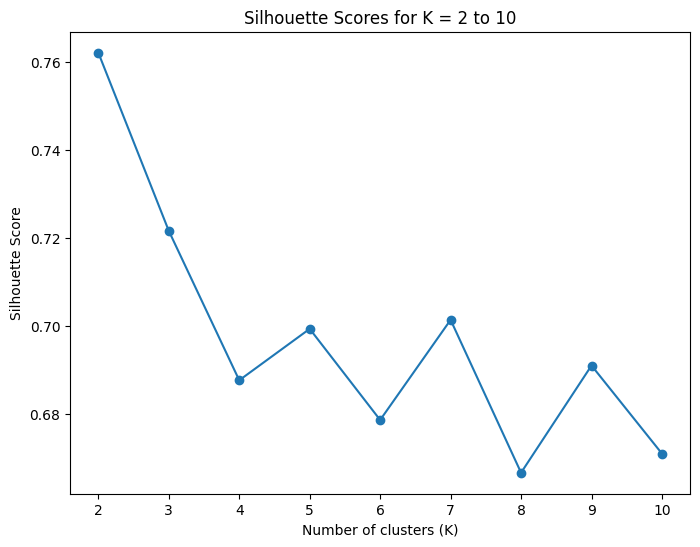

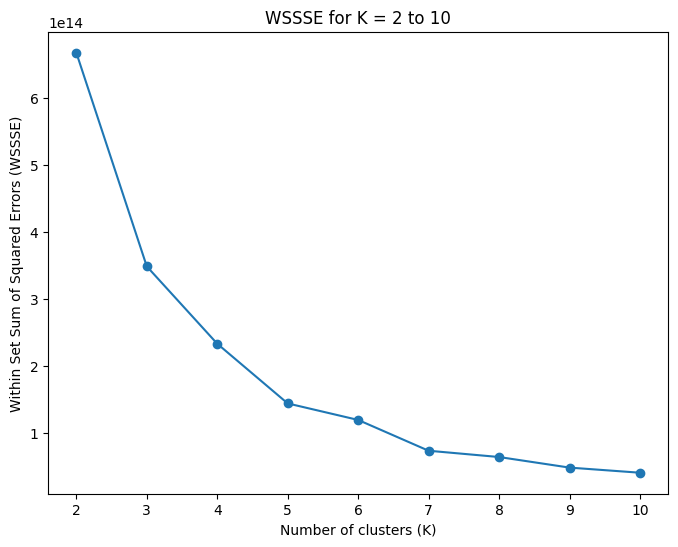

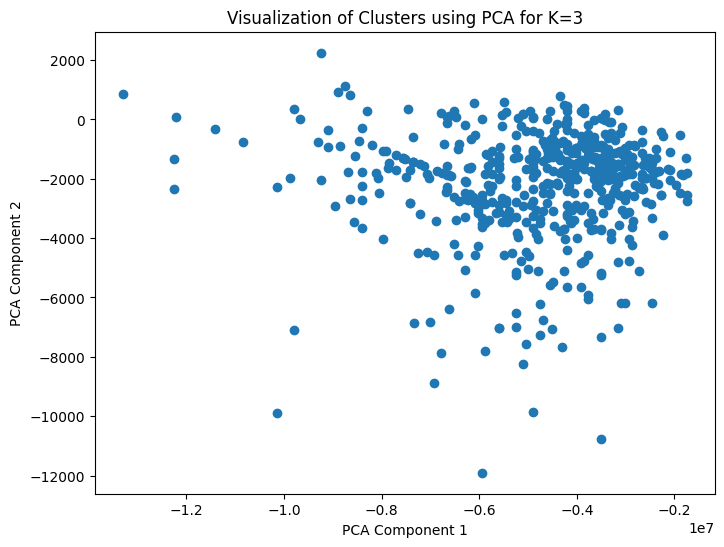

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.appName("KMeans_Clustering").getOrCreate()

# Load the dataset
df = spark.read.csv("/content/drive/MyDrive/CS 4371 HW5/Housing.csv", header=True, inferSchema=True)

# Remove categorical features for clustering
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Drop categorical columns
for col in categorical_cols:
    if col in df.columns:
        df = df.drop(col)

# Assemble features
feature_cols = df.columns
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(df).select('features')

# Plot Silhouette scores for K = 2 to 10
silhouette_scores = []
wssse_values = []

for k in range(2, 11):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(data)
    predictions = model.transform(data)

    # Calculate Silhouette Score
    evaluator = ClusteringEvaluator()
    silhouette_score = evaluator.evaluate(predictions)
    silhouette_scores.append(silhouette_score)

    # Calculate WSSSE (Within Set Sum of Squared Errors)
    centroids = model.clusterCenters()
    clustered_data = model.transform(data)
    wssse = clustered_data.select('features', 'prediction').rdd.map(lambda x: np.linalg.norm(x[0] - centroids[x[1]]) ** 2).sum()
    wssse_values.append(wssse)

# Plotting Silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K = 2 to 10')
plt.show()

# Plotting WSSSE values for each K
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wssse_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within Set Sum of Squared Errors (WSSSE)')
plt.title('WSSSE for K = 2 to 10')
plt.show()

# Run K-Means for K = 2 to 10 and visualize clusters using PCA for K=3 (example)
k = 3
kmeans = KMeans().setK(k).setSeed(1)
model = kmeans.fit(data)
predictions = model.transform(data)

# Visualizing clusters using PCA (example for k=3)
from pyspark.ml.feature import PCA
pca = PCA(k=2, inputCol="features", outputCol="pca_features")
model_pca = pca.fit(predictions)
transformed = model_pca.transform(predictions).select("pca_features")
pca_data = transformed.collect()

x = [float(row.pca_features[0]) for row in pca_data]
y = [float(row.pca_features[1]) for row in pca_data]

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualization of Clusters using PCA for K=3")
plt.show()

# Stop Spark session
spark.stop()


Question 5

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql.types import StructType, StructField, IntegerType, FloatType

# Create a Spark session
spark = SparkSession.builder.appName("ALS_Recommendation").getOrCreate()

# Define the schema for the ratings dataset
schema = StructType([
    StructField("userId", IntegerType(), True),
    StructField("movieId", IntegerType(), True),
    StructField("rating", FloatType(), True)
])

# Load the ratings dataset with the defined schema
data = spark.read.format("csv").option("header", "false").option("delimiter", "::").schema(schema).load("/content/drive/MyDrive/CS 4371 HW5/ratings.dat")

# Split the data into training and testing sets (70-30 split)
(training, test) = data.randomSplit([0.7, 0.3])

# Build the recommendation model using ALS on the training data
als = ALS(maxIter=5, regParam=0.01, userCol="userId", itemCol="movieId", ratingCol="rating", coldStartStrategy="drop")
model = als.fit(training)

# Evaluate the model by computing the Mean Squared Error (MSE) on the test data
predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName="mse", labelCol="rating", predictionCol="prediction")
mse = evaluator.evaluate(predictions)

print(f"Mean Squared Error (MSE) = {mse}")

# Stop Spark session
spark.stop()


Mean Squared Error (MSE) = 0.8242141131257872


Question 6

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import LogisticRegression
from sparknlp.base import *
from sparknlp.annotator import UniversalSentenceEncoder as USE
from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, FloatType

# Create a Spark session
spark = SparkSession.builder \
    .appName("Text_Classification_with_UNIVERSAL_SENTENCE_ENCODER")\
    .master("local[4]")\
    .config("spark.driver.memory","16G")\
    .config("spark.driver.maxResultSize", "2G") \
    .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.11:2.5.2")\
    .config("spark.kryoserializer.buffer.max", "1000m")\
    .getOrCreate()

# Load train and test datasets
train_df = spark.read.csv("/content/drive/MyDrive/CS 4371 HW5/Train.csv", header=True, inferSchema=True)
test_df = spark.read.csv("/content/drive/MyDrive/CS 4371 HW5/Test.csv", header=True, inferSchema=True)

# Assuming 'text' column contains reviews and 'label' column contains sentiment labels
text_column = "text"
label_column = "label"
train_df = train_df.selectExpr(text_column, label_column)
test_df = test_df.selectExpr(text_column, label_column)

# Create Spark NLP components
document_assembler = DocumentAssembler().setInputCol(text_column).setOutputCol("document")
universal_sentence_encoder = USE.pretrained().setInputCols(["document"]).setOutputCol("sentence_embeddings")

# Define a function to handle array-to-vector conversion
def array_to_vector(arr):
    if len(arr) == 1:
        return Vectors.dense(arr[0])
    else:
        return Vectors.dense(arr)

# Convert arrays to VectorUDT using UDF
array_to_vector_udf = udf(array_to_vector, VectorUDT())

# Create pipeline stages
pipeline = Pipeline(stages=[
    document_assembler,
    universal_sentence_encoder
])

# Fit the pipeline on training data
pipeline_model = pipeline.fit(train_df)

# Transform train and test datasets
train_embeddings = pipeline_model.transform(train_df)
test_embeddings = pipeline_model.transform(test_df)

train_features = train_embeddings.withColumn("features", array_to_vector_udf("sentence_embeddings.embeddings"))
test_features = test_embeddings.withColumn("features", array_to_vector_udf("sentence_embeddings.embeddings"))

# Index labels with 'handleInvalid' set to 'keep' to handle unseen labels
indexer = StringIndexer(inputCol=label_column, outputCol="label_index", handleInvalid="keep").fit(train_features)

# Create a Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="label_index")

# Train the Logistic Regression model
model = lr.fit(indexer.transform(train_features))

# Make predictions on the test dataset
predictions = model.transform(indexer.transform(test_features))

# Stop Spark session
spark.stop()


TypeError: ignored